## ---- Project || Creating an ML Model Which Can Predict Health Insurance Cost for a Customer or Family|| ----

### Introduction of Project ::--

--- Health insurance is a critical component of modern healthcare systems to provide financial protection and access to medical services for individuals and families. However, determining the appropriate premium for health insurance plans is a complex and data-driven task. Insurance companies are nowa days more focused to employ statistical methods to calculate insurance prices based on various factors like age,gender,BMI,some pre-existing conditions and more. With the help of machine learning we can enhance the accuracy,efficiency of this process and revolutionalize the whole insurance sector with better results.
    

### Project Objective ::--

--- The objectives of an end-to-end machine learning project focused on predicting health insurance prices are multi-faceted and aim to address various stakeholder's needs. 
<br>
    In general,The most essential objective of this project "Proposal of ML model to predict health insurance price for individual or family" is to create a data-driven,fair and efficient pricing model that benefits both insurance providers and policyholders. It aims to improve the insurance process with reducing risks, enhancing fairness and promoting transparency while complying with relevant regulations.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## -- Basic Data Exploration --

#### <font color = 'Orange'>--- Reading Provided Files to Dataframe ---

#### <font color = 'Orange'>--- Reading the "Health_insurance_cost.xlsx" dataframe --

In [3]:
health=pd.read_excel("Health_insurance_cost.xlsx")
health

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [4]:
health.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [5]:
health.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


In [6]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [7]:
health.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [8]:
health.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


#### <font color = 'Orange'>---- Checking For Duplicate Values ----

In [9]:
health.shape

(1338, 7)

In [10]:
health[health.duplicated(keep=False)]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
195,19.0,male,30.59,0,no,northwest,1639.5631
581,19.0,male,30.59,0,no,northwest,1639.5631


In [11]:
health.drop_duplicates(inplace=True)

In [12]:
health.shape

(1337, 7)

#### <font color = 'Yellow'>---->> Here one entry got deleted from the dataset.So it means one duplicate entry was present in the "health" dataframe.

### ---- Exploratory Data Analysis ----

#### <font color = 'Orange'>---Exploring The Missing Values--- 

<Axes: >

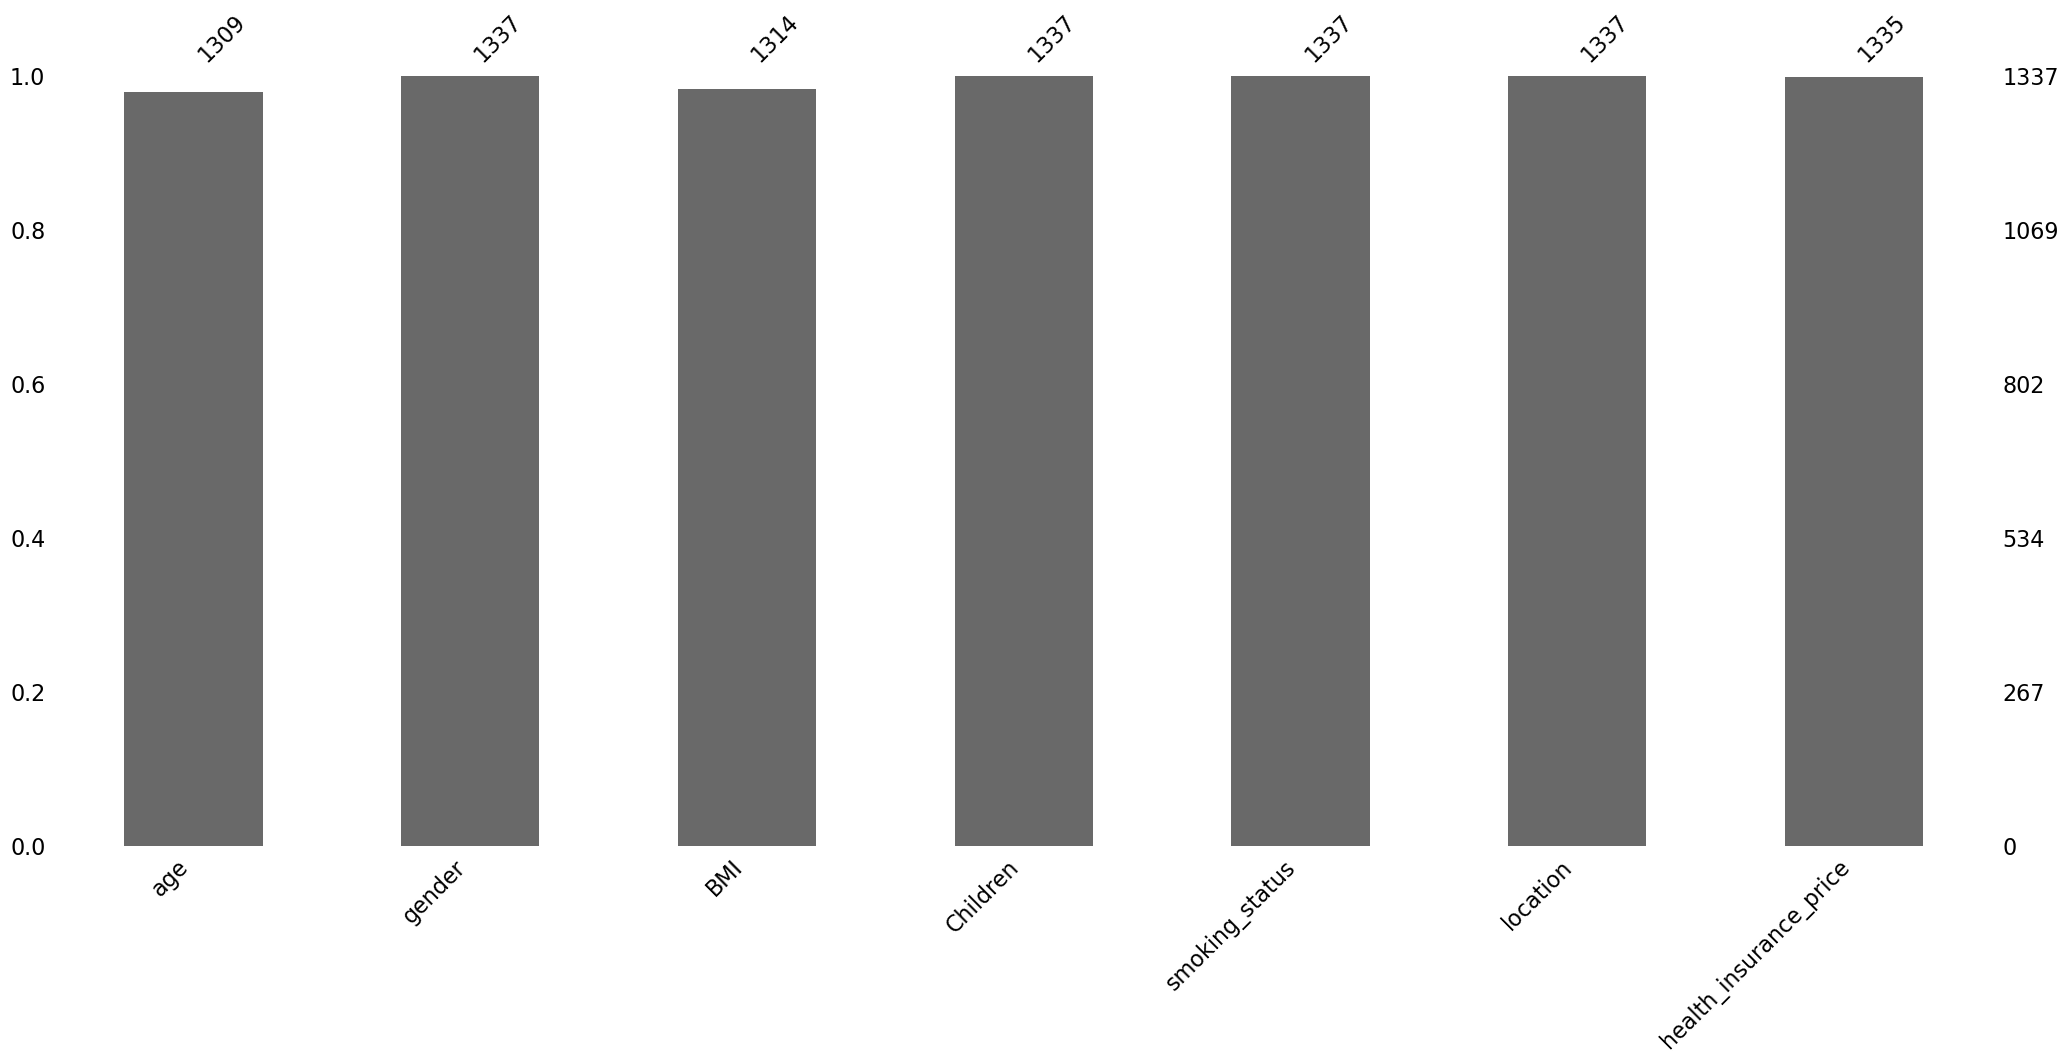

In [13]:
import missingno as msno
msno.bar(health)

<Axes: >

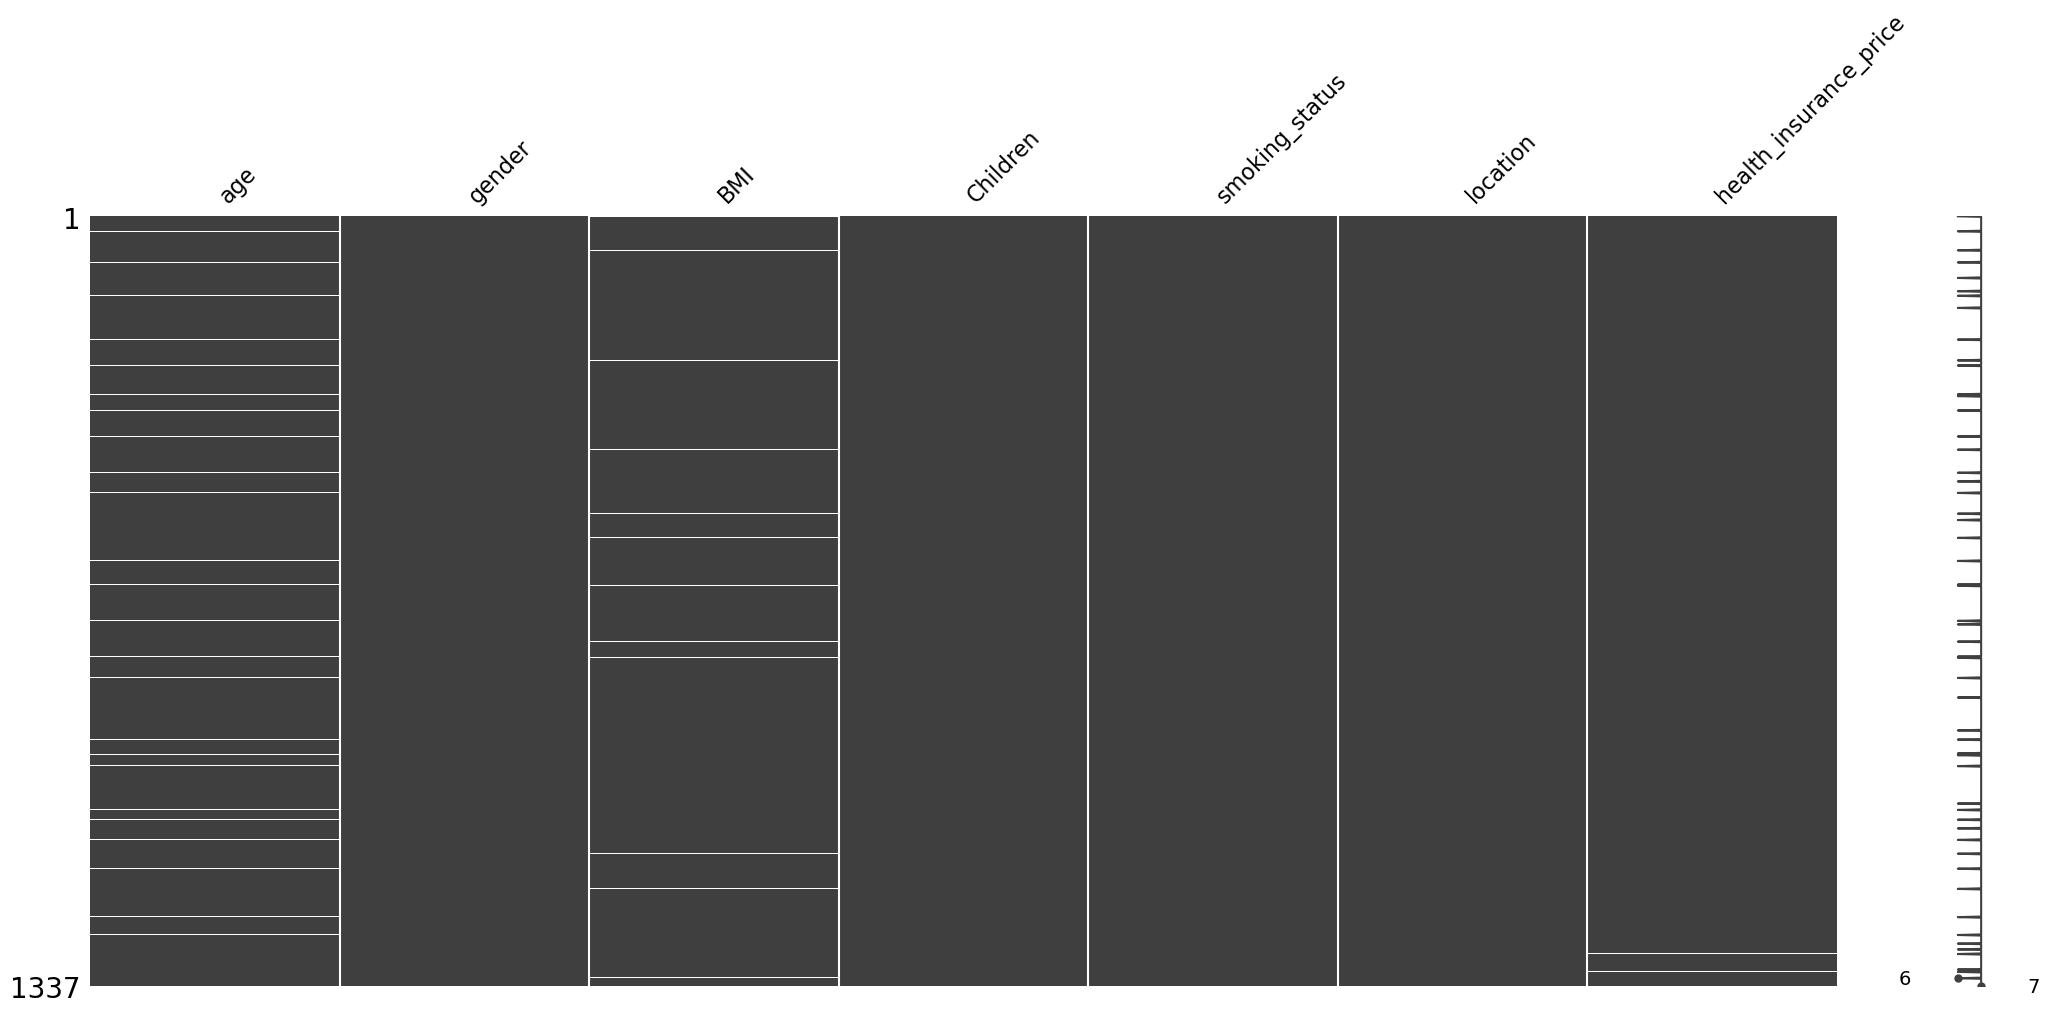

In [14]:
msno.matrix(health)

#### <font color = 'Yellow'>---- With these Visualizations we can see that in "age" and "BMI" columns,few missing values are present and also in "health_insurance_price" a very less amount of missing value present.  

#### <font color = 'Orange'>---Dealing With The Missing Values--- 

In [15]:
health.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [16]:
#### Droping the null values in "health_insurance_price" and "BMI" ####
health=health.dropna(subset=["health_insurance_price","BMI"])

In [17]:
health["health_insurance_price"].isnull().sum()

0

In [18]:
health["BMI"].isnull().sum()

0

In [19]:
#### Here with "Mode-Imputation" going to fill the null values of age ####
health["age"]=health["age"].fillna(health["age"].mode()[0])

In [20]:
health["age"].isnull().sum()

0

In [21]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 1 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1312 non-null   float64
 1   gender                  1312 non-null   object 
 2   BMI                     1312 non-null   float64
 3   Children                1312 non-null   int64  
 4   smoking_status          1312 non-null   object 
 5   location                1312 non-null   object 
 6   health_insurance_price  1312 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 82.0+ KB


In [22]:
health.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
5,31.0,female,25.740,0,no,southeast,3756.62160


#### <font color = 'Yellow'>---->> Here it is noted that some float type numerical columns have longer values.So as per requirement going to convert or round up the values of the columns.

In [23]:
health["BMI"]=round(health["BMI"],2)
health["health_insurance_price"]=round(health["health_insurance_price"],2)

In [24]:
health.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1,18.0,male,33.77,1,no,southeast,1725.55
2,28.0,male,33.00,3,no,southeast,4449.46
3,33.0,male,22.70,0,no,northwest,21984.47
4,32.0,male,28.88,0,no,northwest,3866.86
5,31.0,female,25.74,0,no,southeast,3756.62


In [195]:
health.to_csv("cleaned_data.csv")

In [25]:
main_df=pd.read_csv("cleaned_data.csv")
main_df

,Unnamed: 0,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,1,18.0,male,33.77,1,no,southeast,1725.55
1,2,28.0,male,33.00,3,no,southeast,4449.46
2,3,33.0,male,22.70,0,no,northwest,21984.47
3,4,32.0,male,28.88,0,no,northwest,3866.86
4,5,31.0,female,25.74,0,no,southeast,3756.62
...,...,...,...,...,...,...,...,...
1307,1333,50.0,male,30.97,3,no,northwest,10600.55
1308,1334,18.0,female,31.92,0,no,northeast,2205.98
1309,1335,18.0,female,36.85,0,no,southeast,1629.83
1310,1336,21.0,female,25.80,0,no,southwest,2007.94


In [26]:
main_df.drop(columns=["Unnamed: 0"],inplace=True)

In [27]:
main_df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,18.0,male,33.77,1,no,southeast,1725.55
1,28.0,male,33.00,3,no,southeast,4449.46
2,33.0,male,22.70,0,no,northwest,21984.47
3,32.0,male,28.88,0,no,northwest,3866.86
4,31.0,female,25.74,0,no,southeast,3756.62


#### <font color = 'Orange'>---- Outlier Treatment ----

In [28]:
main_df.describe(percentiles=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.99])

,age,BMI,Children,health_insurance_price
count,1312.000000,1312.000000,1312.000000,1312.000000
mean,38.722561,30.631364,1.088415,13229.887195
std,14.275779,6.107098,1.206309,12084.626847
min,18.000000,15.960000,0.000000,1121.870000
10%,19.000000,22.909000,0.000000,2323.510000
20%,23.000000,25.300000,0.000000,3974.732000
30%,28.000000,27.260000,0.000000,5474.127000
40%,33.000000,28.780000,0.000000,7390.470000
50%,39.000000,30.300000,1.000000,9369.615000
60%,44.000000,32.010000,1.000000,11388.974000


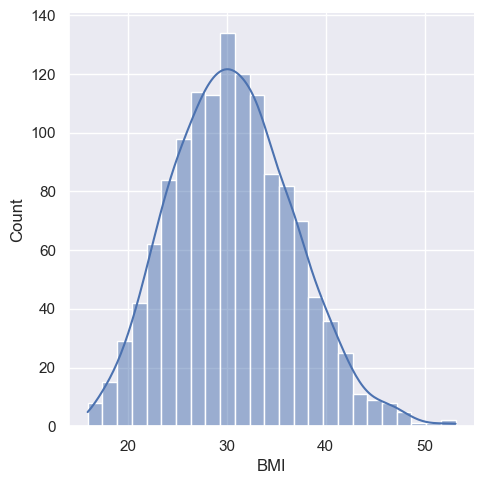

In [36]:
sns.set()
sns.displot(main_df["BMI"],kde=True)

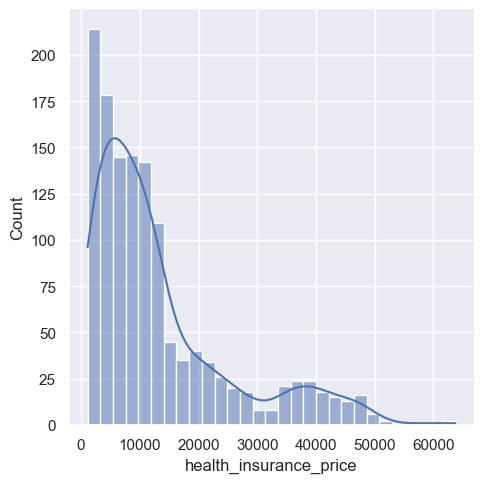

In [37]:
sns.displot(main_df["health_insurance_price"],kde=True)

In [41]:
z=stats.zscore(main_df["health_insurance_price"])
z

0      -0.952344
1      -0.726855
2       0.724716
3      -0.775084
4      -0.784210
          ...   
1307   -0.217660
1308   -0.912574
1309   -0.960268
1310   -0.928968
1311    1.317173
Name: health_insurance_price, Length: 1312, dtype: float64

In [46]:
data=main_df.iloc[np.where (z>3)]
data

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
33,28.0,male,36.40,1,yes,southwest,51194.56
533,54.0,female,47.41,0,yes,southeast,63770.43
566,31.0,female,38.10,1,yes,northeast,58571.07
803,33.0,female,35.53,0,yes,northwest,55135.40
1125,60.0,male,32.80,0,yes,southwest,52590.83
1208,52.0,male,34.48,3,yes,northwest,60021.40
1219,64.0,male,36.96,2,yes,southeast,49577.66
1276,45.0,male,30.36,0,yes,southeast,62592.87


#### <font color = 'Yellow'>---- Here we see in output column there are presence of some outliers,but removing these outliers can majorly affect the ML models. So,these outliers are going to stay with the datframe.

In [50]:
main_df.shape

(1312, 7)

#### <font color = 'Orange'>---- Analyzing The Categorical Columns with Distributions ----

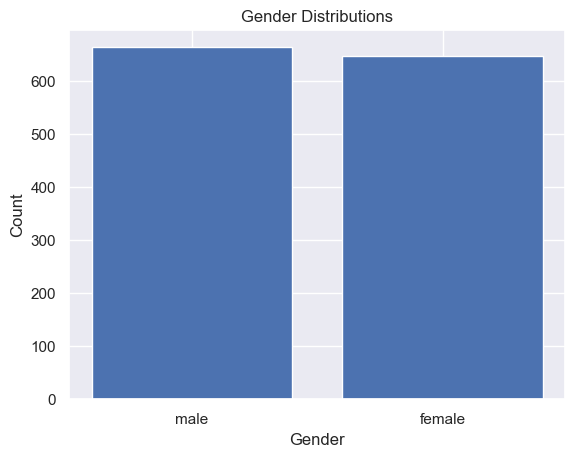

male      664
female    648
Name: gender, dtype: int64

In [51]:
plt.bar(main_df["gender"].unique(),height=main_df["gender"].value_counts())
plt.title("Gender Distributions")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
main_df["gender"].value_counts()

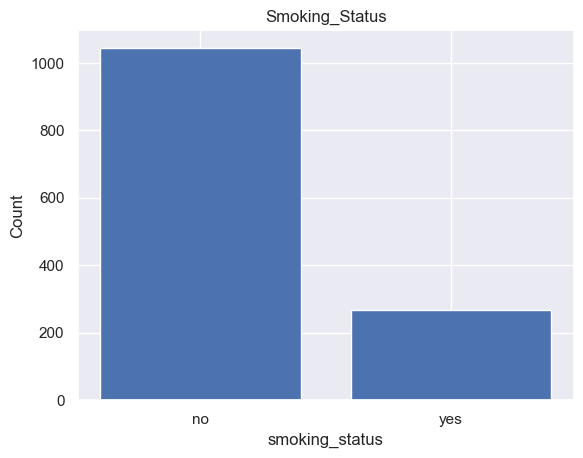

no     1045
yes     267
Name: smoking_status, dtype: int64

In [52]:
plt.bar(main_df["smoking_status"].unique(),height=main_df["smoking_status"].value_counts())
plt.title("Smoking_Status")
plt.xlabel("smoking_status")
plt.ylabel("Count")
plt.show()
main_df["smoking_status"].value_counts()

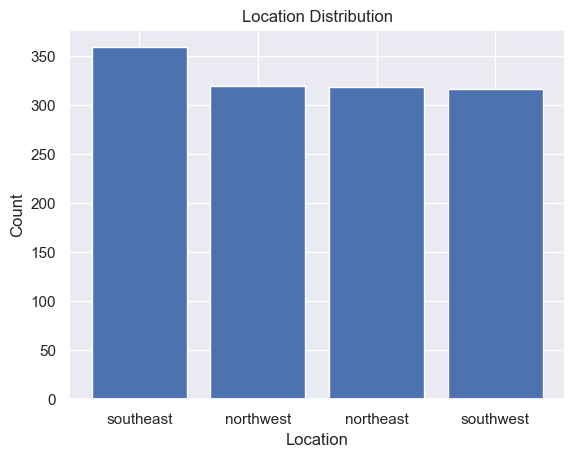

southeast    359
northeast    319
northwest    318
southwest    316
Name: location, dtype: int64

In [53]:
plt.bar(main_df["location"].unique(),height=main_df["location"].value_counts())
plt.title("Location Distribution")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()
main_df["location"].value_counts()

#### <font color = 'Orange'>---- Analysing The Relation Between Categorical Columns and Output Column with visualization ----

<Axes: xlabel='gender', ylabel='health_insurance_price'>

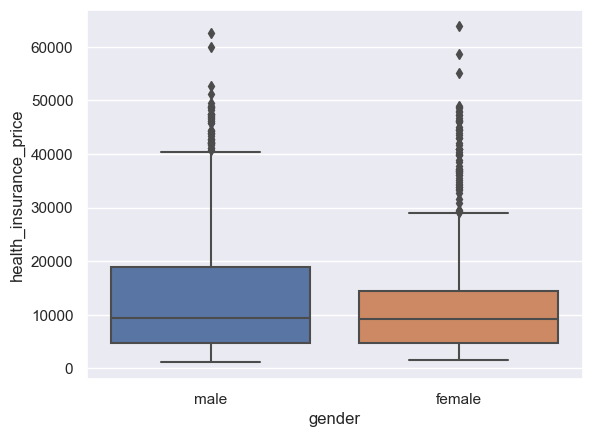

In [54]:
sns.boxplot(x="gender",y="health_insurance_price",data=main_df)

<Axes: xlabel='smoking_status', ylabel='health_insurance_price'>

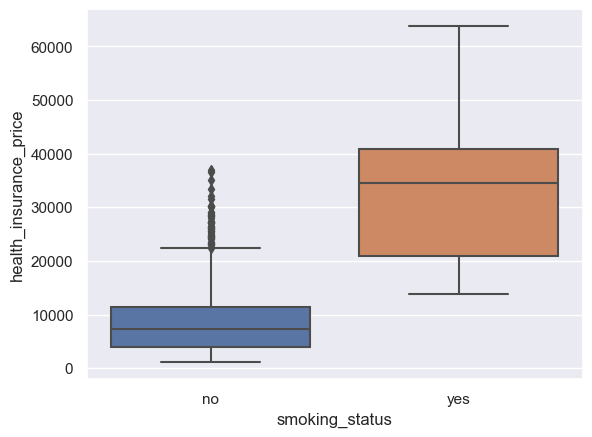

In [56]:
sns.boxplot(x="smoking_status",y="health_insurance_price",data=main_df)

Text(0.5, 1.0, 'Age vs health_insurance_price')

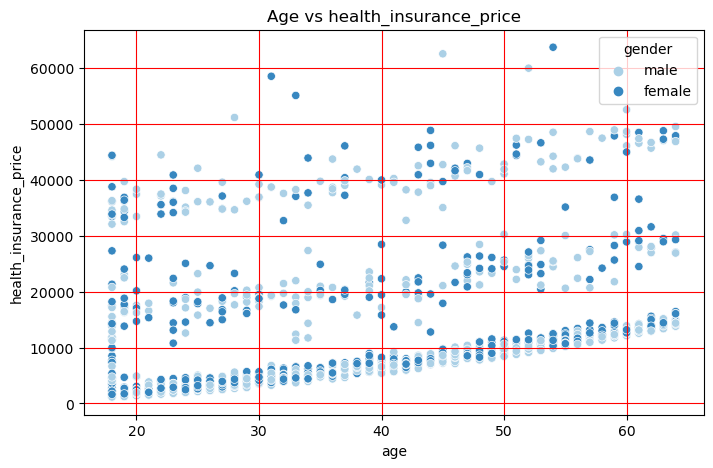

In [53]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="age",y="health_insurance_price",hue="gender",data=main_df,palette="Blues")
plt.grid(color="red")
plt.title("Age vs health_insurance_price")

Text(0.5, 1.0, 'BMI vs health_insurance_price')

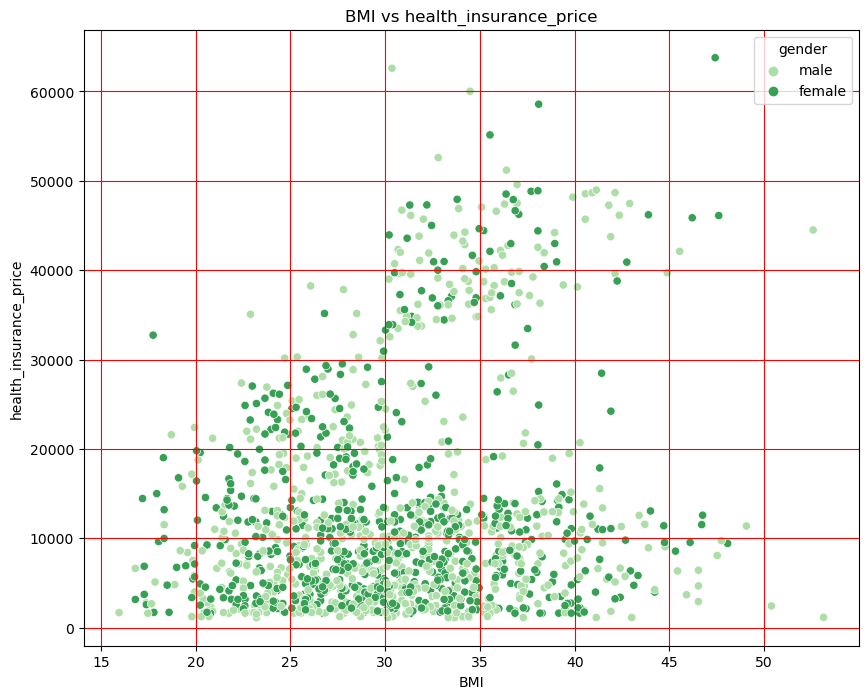

In [52]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="BMI",y="health_insurance_price",hue="gender",data=main_df,palette="Greens")
plt.grid(color="red")
plt.title("BMI vs health_insurance_price")

<Axes: xlabel='location', ylabel='health_insurance_price'>

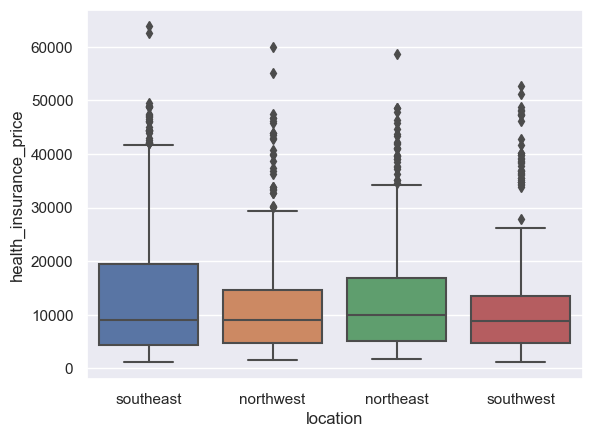

In [57]:
sns.boxplot(x="location",y="health_insurance_price",data=main_df)

#### <font color = 'White'>---->> By analysing this visuals of relation of different features with the resultant we can observe the factors on which the dependencies of the resultant column is more or less.

In [59]:
main_df.corr(method="spearman")

,age,BMI,Children,health_insurance_price
age,1.000000,0.100509,0.054650,0.513451
BMI,0.100509,1.000000,0.012090,0.119487
Children,0.054650,0.012090,1.000000,0.128459
health_insurance_price,0.513451,0.119487,0.128459,1.000000


### ---- Prepearing Data for Applying ML Algorithms ----

####  <font color = 'Orange'>---- Applying Feature Encoding ----

In [61]:
main_df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,18.0,male,33.77,1,no,southeast,1725.55
1,28.0,male,33.00,3,no,southeast,4449.46
2,33.0,male,22.70,0,no,northwest,21984.47
3,32.0,male,28.88,0,no,northwest,3866.86
4,31.0,female,25.74,0,no,southeast,3756.62


In [62]:
    #### Binary Mapping ####

variables=["gender","smoking_status"]
def binary_map(var):
    return var.map({"male":1,"female":0,"yes":1,"no":0})
main_df[variables]=main_df[variables].apply(binary_map)

In [63]:
main_df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,18.0,1,33.77,1,0,southeast,1725.55
1,28.0,1,33.00,3,0,southeast,4449.46
2,33.0,1,22.70,0,0,northwest,21984.47
3,32.0,1,28.88,0,0,northwest,3866.86
4,31.0,0,25.74,0,0,southeast,3756.62


In [65]:
    #### Dummy Encoding ####
    
location_dummy=pd.get_dummies(main_df["location"])
location_dummy.head()

,northeast,northwest,southeast,southwest
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [66]:
insert_pos=6
main_df=pd.concat([main_df.iloc[:, :insert_pos],location_dummy,main_df.iloc[:, insert_pos:]],axis=1)
main_df.head()

,age,gender,BMI,Children,smoking_status,location,northeast,northwest,southeast,southwest,health_insurance_price
0,18.0,1,33.77,1,0,southeast,0,0,1,0,1725.55
1,28.0,1,33.00,3,0,southeast,0,0,1,0,4449.46
2,33.0,1,22.70,0,0,northwest,0,1,0,0,21984.47
3,32.0,1,28.88,0,0,northwest,0,1,0,0,3866.86
4,31.0,0,25.74,0,0,southeast,0,0,1,0,3756.62


In [68]:
main_df.drop(columns=["location"],inplace=True)

In [70]:
main_df.head()

,age,gender,BMI,Children,smoking_status,northeast,northwest,southeast,southwest,health_insurance_price
0,18.0,1,33.77,1,0,0,0,1,0,1725.55
1,28.0,1,33.00,3,0,0,0,1,0,4449.46
2,33.0,1,22.70,0,0,0,1,0,0,21984.47
3,32.0,1,28.88,0,0,0,1,0,0,3866.86
4,31.0,0,25.74,0,0,0,0,1,0,3756.62


<Axes: >

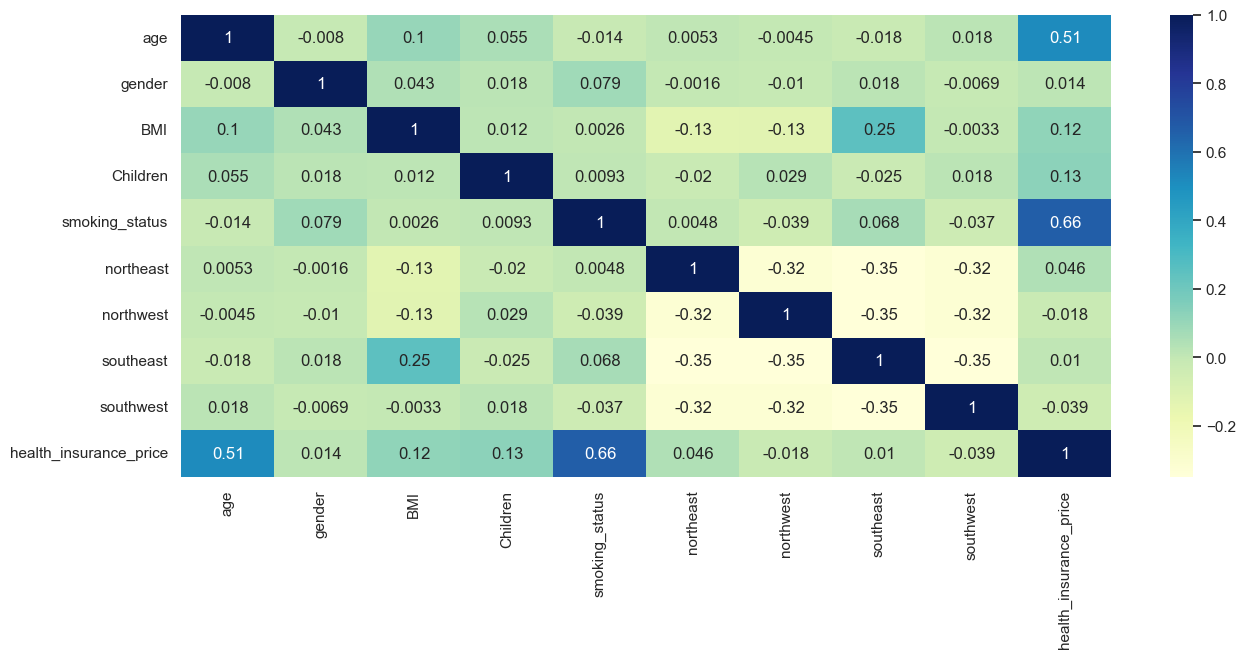

In [75]:
##### Checking correlation through heatmap Visualization ####

plt.figure(figsize=(15,6))
sns.heatmap(main_df.corr(method="spearman"),cmap="YlGnBu",annot=True)

In [77]:
main_df.to_csv("master_dataframe.csv")

In [3]:
ml_df=pd.read_csv("master_dataframe.csv")
ml_df

,Unnamed: 0,age,gender,BMI,Children,smoking_status,northeast,northwest,southeast,southwest,health_insurance_price
0,0,18.0,1,33.77,1,0,0,0,1,0,1725.55
1,1,28.0,1,33.00,3,0,0,0,1,0,4449.46
2,2,33.0,1,22.70,0,0,0,1,0,0,21984.47
3,3,32.0,1,28.88,0,0,0,1,0,0,3866.86
4,4,31.0,0,25.74,0,0,0,0,1,0,3756.62
...,...,...,...,...,...,...,...,...,...,...,...
1307,1307,50.0,1,30.97,3,0,0,1,0,0,10600.55
1308,1308,18.0,0,31.92,0,0,1,0,0,0,2205.98
1309,1309,18.0,0,36.85,0,0,0,0,1,0,1629.83
1310,1310,21.0,0,25.80,0,0,0,0,0,1,2007.94


In [4]:
ml_df.drop(columns=["Unnamed: 0"],inplace=True)

In [5]:
ml_df.head()

,age,gender,BMI,Children,smoking_status,northeast,northwest,southeast,southwest,health_insurance_price
0,18.0,1,33.77,1,0,0,0,1,0,1725.55
1,28.0,1,33.00,3,0,0,0,1,0,4449.46
2,33.0,1,22.70,0,0,0,1,0,0,21984.47
3,32.0,1,28.88,0,0,0,1,0,0,3866.86
4,31.0,0,25.74,0,0,0,0,1,0,3756.62


In [6]:
ml_df.shape

(1312, 10)

### ---- Applying ML Algorithms to the Datset ----

####  <font color = 'Orange'>---- Feature Selection and Model Building [ML MODEL] ----

####  <font color = 'White'>---- Feature Scaling ----

In [7]:
from sklearn.model_selection import train_test_split    #### For Training and Testing ####
from sklearn.model_selection import ShuffleSplit    #### For Applying Cross Validation ####
from sklearn.model_selection import cross_val_score    #### For Checking The Cross Validation Score ####

In [8]:
#### Spliting The Datframe ####
X=ml_df.drop(columns=["health_insurance_price"])
Y=ml_df["health_insurance_price"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70,test_size=0.30,stratify=None,
                                               random_state=500) 

In [30]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((918, 9), (394, 9), (918,), (394,))

#### <font color = 'Orange'>---- Standardization or Scaling The dataframe using Standard Scaler Function ----

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
std_scaler=StandardScaler()
std_X_train=std_scaler.fit_transform(X_train)
std_X_test=std_scaler.fit_transform(X_test)

std_X_train.shape , std_X_test.shape

((918, 9), (394, 9))

#### -- Applying Different ML Algorithms to Check the Performance and Decide the Best Suitable Model --

#### <font color = 'Orange'>---- Linear Regression ----

#### <font color = 'White'>---- Model Training ----

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [138]:
lin_reg=LinearRegression()
lin_reg.fit(std_X_train,Y_train)

LinearRegression()

#### <font color = 'White'>---- Model Evaluation ----

In [139]:
Y_pred=lin_reg.predict(std_X_test)
Y_pred

array([ 7730.74739398, 25629.4110433 , 10318.18098696, 10858.75048859,
        4993.01109197,  8416.82163336,  9583.08684391, 23998.66244202,
       26063.49781844, 13870.23836637, 32365.03901793, 13141.83795537,
       -1117.68294706, 16233.82468148,  7834.37106861, 10910.68673615,
       22132.23441598, 14568.1973629 , 13826.03947642, 10606.76409402,
        1880.14211713,  7430.20665575, 26420.35112102, 14399.083608  ,
       11706.36520823,  1899.30624699,  7375.47997258,  7507.53671818,
       12063.46642665,  6803.79345173, 14101.38742316,  9357.91099627,
       13685.43922604,  2148.01983384,  8004.81177048,  9035.77143166,
        9815.20544401,  3015.64048906, 13351.56413945, 10348.33906453,
        1926.31746742, 12816.17095281, 32330.55045035, 12283.15318689,
        7626.1461363 ,  7551.09818938, 30260.44071848, 31610.36620931,
       31984.40234766,  3304.18288999,   461.36705493,  5857.85143362,
        8344.12905418,  6774.46376824, 10173.42444325,  1068.56205534,
      

In [140]:
Y_test

973      7144.86
1012    44423.80
830      2438.06
174      8538.29
146      5125.22
          ...   
989     24915.22
53       8059.68
190      1639.56
247      4260.74
477     12475.35
Name: health_insurance_price, Length: 394, dtype: float64

In [141]:
r2_score(Y_test,Y_pred)

0.7232535269918932

#### <font color = 'White'>---- Cross Validation ----

In [151]:
model=LinearRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
result=cross_val_score(model,X,Y,cv=ssplit)

In [152]:
print(result)
print(result.mean())

[0.72337056 0.77871863 0.71126758 0.76045986 0.76001191 0.76222024
 0.72355877 0.71153709 0.76625271 0.7553953 ]
0.7452792652949082


#### <font color = 'Orange'>----Decision Tree Regressor----

#### <font color = 'White'>---- Model Training ----

In [153]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [154]:
d_tree=DecisionTreeRegressor(max_depth=10,max_features=30,random_state=50)
d_tree.fit(std_X_train,Y_train)

#### For Contineous target variable we are using Decision Tree Regressor ####

DecisionTreeRegressor(max_depth=10, max_features=30, random_state=50)

#### <font color = 'White'>---- Model Evaluation ----

In [155]:
Y_pred=d_tree.predict(std_X_test)
Y_pred

array([ 6662.18666667, 34779.62      ,  3875.73      ,  7237.57727273,
        5116.5       , 12797.21      ,  1159.47833333, 16297.85      ,
       33904.1       , 12991.66652174, 40182.25      , 30063.58      ,
        1915.63375   , 12797.61666667,  7941.514     ,  9973.8575    ,
       13747.87      , 13112.6       , 13981.85      , 12432.02666667,
        2961.79888889, 28340.19      , 15359.1       , 12797.61666667,
        7731.86      ,  1915.63375   ,  4541.98333333,  4830.63      ,
        8125.78      ,  4541.98333333, 12797.61666667,  9582.4275    ,
        9973.8575    ,  8599.565     ,  7941.514     ,  9101.8       ,
       13313.848     ,  1727.60230769, 11281.26      , 12991.66652174,
        2849.25666667, 15019.76      , 23244.79      ,  9973.8575    ,
        4921.31076923,  5507.884     , 22144.03      , 23568.27      ,
       40904.2       ,  2775.19      ,  1650.87      ,  5724.105     ,
        8183.73      ,  7290.07      , 12712.48166667,  1830.888     ,
      

In [156]:
Y_test

973      7144.86
1012    44423.80
830      2438.06
174      8538.29
146      5125.22
          ...   
989     24915.22
53       8059.68
190      1639.56
247      4260.74
477     12475.35
Name: health_insurance_price, Length: 394, dtype: float64

In [157]:
r2_score(Y_test,Y_pred)

0.7520751773929129

#### <font color = 'White'>---- Cross Validation ----

In [180]:
model=DecisionTreeRegressor()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
result=cross_val_score(model,X,Y,cv=ssplit)

In [181]:
print(result)
print(result.mean())

[0.72559943 0.6734038  0.68266516 0.80891139 0.63761497 0.63655421
 0.72398581 0.75513918 0.7516562  0.72106021]
0.7116590363983102


#### <font color = 'Orange'>---- Random Forest regressor ----

#### <font color = 'White'>---- Model Training ----

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [38]:
rf_reg=RandomForestRegressor(max_depth=60,min_samples_leaf=7,n_estimators=1200,random_state=100)
rf_reg.fit(std_X_train,Y_train)

RandomForestRegressor(max_depth=60, min_samples_leaf=7, n_estimators=1200,
                      random_state=100)

#### <font color = 'White'>---- Model Evaluation ----

In [39]:
Y_pred=rf_reg.predict(std_X_test)
Y_pred

array([ 7763.86200106, 35902.7264688 ,  3099.8045848 ,  8635.7136016 ,
        7102.84257156,  8564.47565208,  2621.14590746, 18230.10837685,
       34741.72352621, 13148.75164086, 39451.5696693 , 12988.7010431 ,
        2902.35160691, 12163.52878242,  9022.35851502, 10829.52803052,
       16077.82535432, 15152.33511802, 14329.99480744, 13758.16809885,
        4571.49869793,  8563.12339504, 17878.94451109, 12746.1723748 ,
       10156.18821044,  2558.51953767,  6900.41014575,  6858.50543752,
       10359.27412677,  7168.66328314, 13114.29656308, 12861.59508678,
       10776.98856971,  4003.85273629,  9054.14678133,  9994.78732094,
       13739.88089833,  4899.14721921, 12420.81206358, 13619.64036676,
        6294.41013274, 14245.0210333 , 23372.46961006, 11366.89032999,
        5919.19912177,  7766.39819054, 26152.95970326, 26187.56876039,
       39700.43732922,  3350.35915425,  3481.57247779,  6650.95458641,
        9392.16017601,  6296.68757545, 11479.03923889,  3317.05301652,
      

In [40]:
Y_test

973      7144.86
1012    44423.80
830      2438.06
174      8538.29
146      5125.22
          ...   
989     24915.22
53       8059.68
190      1639.56
247      4260.74
477     12475.35
Name: health_insurance_price, Length: 394, dtype: float64

In [47]:
r2_score(Y_test,Y_pred)

0.8293022903092059

#### <font color = 'White'>---- Cross Validation ----

In [42]:
model=RandomForestRegressor()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
result=cross_val_score(model,X,Y,cv=ssplit)

In [43]:
print(result)
print(result.mean())

[0.81101203 0.83363529 0.84222733 0.80528027 0.84975422 0.84470146
 0.83950096 0.8425757  0.84127509 0.84458161]
0.8354543940735397


#### <font color = 'Orange'>---- XGBoost(XGB Regressor) ----

#### <font color = 'White'>---- Model Training ----

In [65]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [112]:
xgb_reg=XGBRegressor(n_estimators=1000,max_depth=7,eta=0.3,subsample=1.0,colsample_bytree=1.0,
                     random_state=100) ## max_depth=1 to 10,subsample=0 to 1,colsample_bytree=0 to 1 ##
xgb_reg.fit(std_X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

#### <font color = 'White'>---- Model Evaluation ----

In [113]:
Y_prd=xgb_reg.predict(std_X_test)
Y_prd

array([ 6892.556  , 34112.246  ,  2940.4949 ,  8871.528  ,  7042.9746 ,
        9641.515  ,  1641.0046 , 19021.87   , 34578.01   , 11934.624  ,
       33233.824  , 12078.163  ,  2177.9526 , 12666.441  ,  7696.1436 ,
       11400.719  , 15271.73   , 13634.002  , 15019.031  , 12271.406  ,
        3151.935  ,  8732.348  , 17556.363  , 11704.836  , 12508.253  ,
        1464.944  ,  7969.709  ,  4553.5977 ,  9127.887  ,  6000.7236 ,
       14407.3    ,  9632.966  ,  8053.864  ,  2528.446  ,  8261.518  ,
        9469.119  , 12596.1875 ,  4614.978  , 11434.142  , 12344.954  ,
       13627.53   , 15556.98   , 22893.137  , 11053.204  ,  6187.5264 ,
        4975.111  , 26223.37   , 27300.055  , 39959.527  ,  2231.5566 ,
        1704.7098 ,  4939.7764 ,  8814.37   ,  6151.9653 , 14662.79   ,
        1536.7742 ,  9269.916  ,  8830.782  ,  8460.847  , 22316.451  ,
        1089.6403 ,  3295.7195 ,  4924.515  , 10458.436  , 16807.594  ,
        8532.666  , 35266.89   , 40931.965  , 11660.361  , 41123

In [114]:
Y_test

973      7144.86
1012    44423.80
830      2438.06
174      8538.29
146      5125.22
          ...   
989     24915.22
53       8059.68
190      1639.56
247      4260.74
477     12475.35
Name: health_insurance_price, Length: 394, dtype: float64

In [115]:
r2_score(Y_prd,Y_test)

0.7521434050690562

#### <font color = 'White'>---- Cross Validation ----

In [116]:
model=XGBRegressor()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
result=cross_val_score(model,X,Y,cv=ssplit)

In [117]:
print(result)
print(result.mean())

[0.81602665 0.83545353 0.80316289 0.78142977 0.83806227 0.81687788
 0.78708171 0.78167359 0.76853236 0.76698109]
0.7995281758667077


### <font color = 'Orange'>---- After doing different Regression and Cross-Validation process we have got the different Accuracy as mentioned below ----

#### <font color = 'Yellow'> //1//--- Doing Linear Regression we got the Accuracy of around 72%(r2_score) and 75%(cross_validation).

#### <font color = 'Yellow'>//2//--- Doing Decision Tree Regression we got the Accuracy of around 75%(r2_score) and 71%(cross_validation).

#### <font color = 'Yellow'>//3//--- Doing Random Forest Regression we got the Accuracy of around 83% in both r2_score and cross_validation.

#### <font color = 'Yellow'>//4//--- Doing XGBoost Regression we got the Accuracy of around 75%(r2_score) and 80%(cross_validation).

#### ---- Summery ----
---- In Feature selection and Model building , I have used four different types of Machine Learning models to achieve the best predictive model. So here all the models have performed well and with FOUR Models named as linear Regression process,Decision Tree regression process,Random Forest regression process,XGBoost Regression process we got four different accuracy rates as mentioned above.
    <br>
---- Here with all the models,doing all the hyper-parameter tunnings,I have faced overfitting and underfitting issues as we get kind of huge difference in r2(accuracy) score and cross-validation score except one model which is random forest regression process.
    <br>
---- So,here for this particular project the "Random Forest Regression Process" is the perfect ML model with "83%" of accuracy rate.

### ----- Conclusion -----

---- In conclusion,Here In this "Health-Insurance-Price Prediction" end-to-end project, I set out to develop a machine learning model that can predict most accurate health insurance price for an individual or family. Through a systematic process, I have done all the elementry Data Analysing steps needed and plotted graphs to determine the correlation among the variables and addressed as data exploration,data preprocessing,feature encoding,feature selection and model building and evaluation to achieve our goal. 
<br>

This Health Insurance Price Predictive Model represents a significant step towards making healthcare insurance more transparent,fair and accessible for all. It underscores the power of data and machine learning in revolutionizing the insurance industry. With this data-driven ML model the overall process of insurance will become more fruitful in terms of taking decisions for both the insurance provider as well as the insurance stakeholders. while it also emphasizing the importance of ethical considerations in predictive modeling. As we move forward, we remain committed to continuous improvement and responsible use of technology to create a better future for healthcare and insurance sectors.


## -------------------------------------- END -----------------------------------------